In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns
dataset = pd.read_csv('IRIS - IRIS.csv')
X = dataset.drop("species", axis=1)
Y = dataset["species"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=100)


In [14]:
from sklearn.svm import SVC

classifer = SVC(kernel="linear")
classifer.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train, classifer.predict(X_train))
print(cm)


[[39  0  0]
 [ 0 43  1]
 [ 0  1 36]]


In [16]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

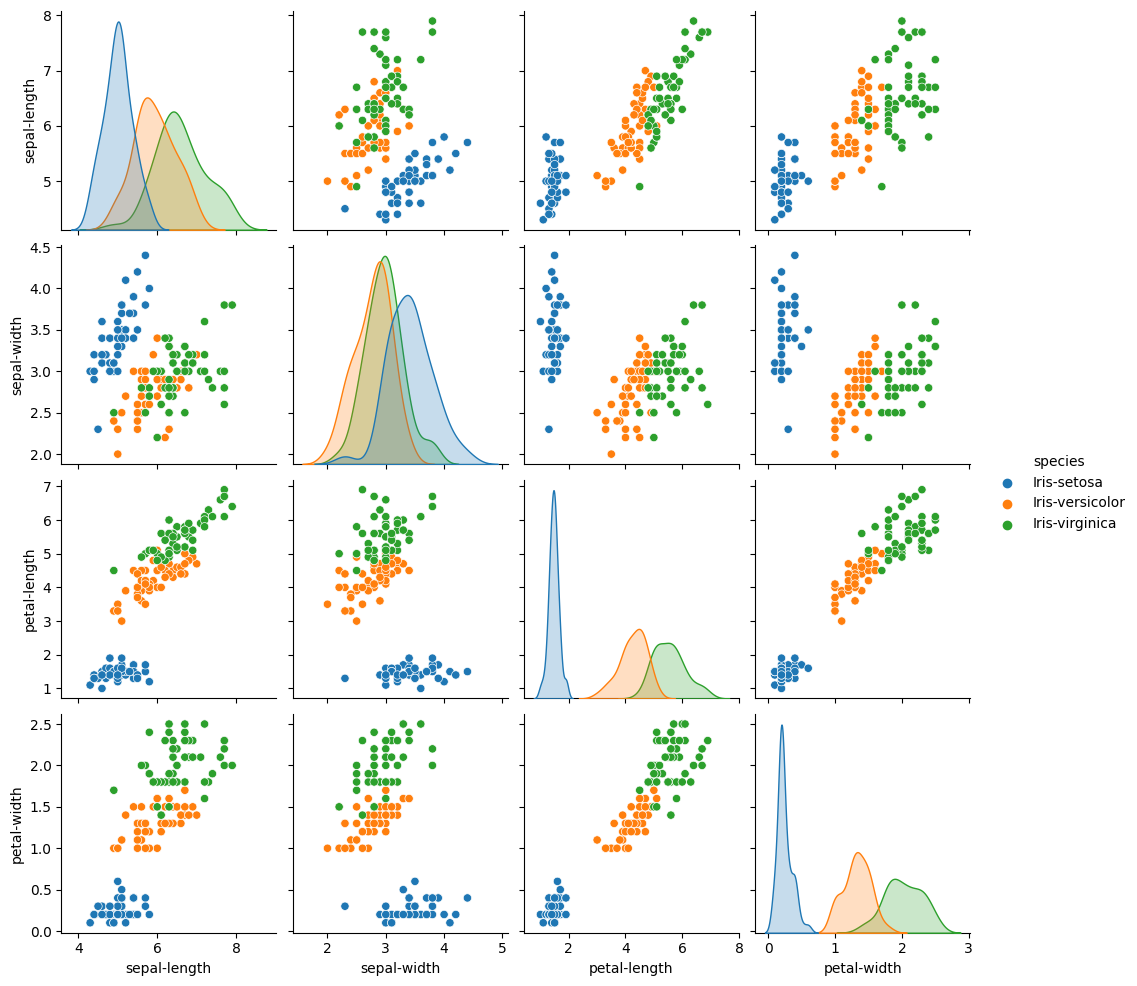

In [19]:
sns.pairplot(dataset,hue='species')

In [20]:
from sklearn.svm import SVC

classifer = SVC(kernel="linear")
classifer.fit(X_train, Y_train)

SVC(kernel='linear')

In [21]:
pred = classifer.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(Y_train, classifer.predict(X_train))
print(cm)

[[39  0  0]
 [ 0 43  1]
 [ 0  1 36]]


In [23]:
print(classification_report(Y_test,pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.375 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 

class_report = classification_report(Y_test, grid_predictions,output_dict =True)
class_0 = class_report['Iris-setosa']
class_1 = class_report['Iris-versicolor']
class_2 = class_report['Iris-virginica']


<BarContainer object of 3 artists>

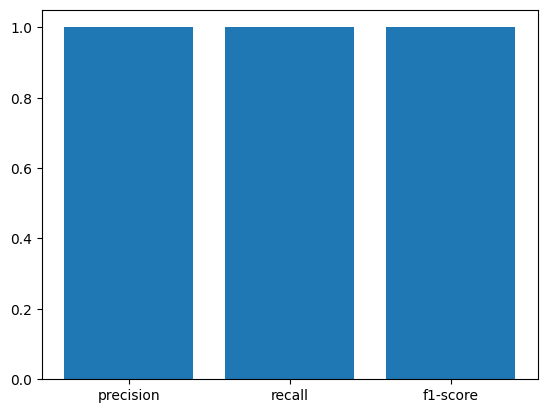

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
func_table = lambda x: pd.DataFrame(x,index = [0]).drop(columns = 'support')
dt = func_table(class_0)
dt2 = func_table(class_1)

plt.bar(dt.keys(),dt.values[0])


In [38]:
iris = np.array([5,3,1.6,0.2]).reshape(1, -1)
p = classifer.predict(iris)
print(p)

['Iris-versicolor']


In [39]:
iris = np.array([5,3,1.6,0.2]).reshape(1, -1)
p = classifer.predict(iris)
print(p)

['Iris-versicolor']
